
Global Internet users

Internet Users Country-wise 1980-2020

source: https://www.kaggle.com/datasets/ashishraut64/internet-users

Content
The following dataset has information about internet users from 1980-2020. Details about the columns are as follows:
* Entity - Contains the name of the countries and the regions
* Code - Information about country code and where code has the value 'Region', it denotes division by grouping various countries.
* Year - Year from 1980-2020
* Cellular Subscription - Mobile phone subscriptions per 100 people. This number can get over 100 when the average person has more than one subscription to a mobile service.
* Internet Users(%) - The share of the population that is accessing the internet for all countries of the world.
* No. of Internet Users - Number of people using the Internet in every country.
* Broadband Subscription - The number of fixed broadband subscriptions per 100 people. This refers to fixed subscriptions to high-speed access to the public Internet (a TCP/IP connection), at downstream speeds equal to, or greater than, 256 kbit/s.

Here are 9 good questions to be answered or visualized after analyzing the data by a data scientist/analyst:
1. How has the number of internet users changed globally from 1980 to 2020?
2. Which countries, excluding those with a penetration rate of 0%, have the highest and lowest internet penetration rates in the most recent year?
3. Which countries have experienced the highest average annual growth in Internet Users? 
4. Is there a correlation between cellular subscriptions and the percentage of internet users in different region?
5. What is the overall trend of broadband subscription rates across income groups?
6. Can we identify any outliers or anomalies in the dataset related to internet usage?
7. How has the ratio of cellular subscriptions to broadband subscriptions changed over time in different countries?
8. Are there any significant differences in internet usage patterns between developed and developing countries?
9. Can we predict future internet usage trends based on historical data and patterns?

These questions can provide valuable insights into the global internet landscape, regional disparities, technology adoption, and user behavior. By visualizing the data through charts, graphs, maps, or other visual representations, the findings can be communicated effectively and facilitate a deeper understanding of the trends and patterns in internet usage.


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import LinearRegression
url = 'https://drive.google.com/uc?export=download&id=1PDBOJyH_Crtx7LjgIpePz7bcGE8ZAxBH'
df = pd.read_csv(url)
display(df)

,Unnamed: 0,Entity,Code,Year,Cellular Subscription,Internet Users(%),No. of Internet Users,Broadband Subscription
0,0,Afghanistan,AFG,1980,0.000000,0.000000,0,0.000000
1,1,Afghanistan,AFG,1981,0.000000,0.000000,0,0.000000
2,2,Afghanistan,AFG,1982,0.000000,0.000000,0,0.000000
3,3,Afghanistan,AFG,1983,0.000000,0.000000,0,0.000000
4,4,Afghanistan,AFG,1984,0.000000,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...
8862,8862,Zimbabwe,ZWE,2016,91.793457,23.119989,3341464,1.217633
8863,8863,Zimbabwe,ZWE,2017,98.985077,24.400000,3599269,1.315694
8864,8864,Zimbabwe,ZWE,2018,89.404869,25.000000,3763048,1.406322
8865,8865,Zimbabwe,ZWE,2019,90.102287,25.100000,3854006,1.395818


Explore the data: After reading the CSV file, we can explore the data using various functions and methods provided by Pandas. Some useful methods for data exploration are:
* info(): Provide information about the data structure, data types, and the number of non-null values in each column.
* describe(): Display summary statistics of the data, such as mean, median, etc., for each numeric column.

In [ ]:
print(df.info()) 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8867 entries, 0 to 8866
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8867 non-null   int64  
 1   Entity                  8867 non-null   object 
 2   Code                    8867 non-null   object 
 3   Year                    8867 non-null   int64  
 4   Cellular Subscription   8867 non-null   float64
 5   Internet Users(%)       8867 non-null   float64
 6   No. of Internet Users   8867 non-null   int64  
 7   Broadband Subscription  8867 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 554.3+ KB
None
        Unnamed: 0         Year  Cellular Subscription  Internet Users(%)  \
count  8867.000000  8867.000000            8867.000000        8867.000000   
mean   4433.000000  2000.151799              39.989614          17.043606   
std    2559.826752    11.812151              51.981410          

Data manipulation and cleaning: After exploring the data, we may need to perform data manipulation and cleaning to prepare it for analysis. Some common tasks include:
* Removing irrelevant columns using drop().
* Filling missing values using fillna().
* Changing the data type of columns using astype().
* Filtering rows based on conditions using conditional row selection.

In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)
df.columns

Index(['Entity', 'Code', 'Year', 'Cellular Subscription', 'Internet Users(%)',
       'No. of Internet Users', 'Broadband Subscription'],
      dtype='object')

Disclaimer: Data for some countries may be unavailable or does not include information on internet users percentage.

In [ ]:
data_2020 = df[df['Year'] == 2020]
missing_data_2020 = data_2020[data_2020['Internet Users(%)'] == 0]
countries_without_Internet_Users_percentage = missing_data_2020['Entity']
countries_array = np.array(countries_without_Internet_Users_percentage)
print(countries_array)

['Andorra' 'Antigua and Barbuda' 'Aruba' 'Barbados' 'Belize' 'Bermuda'
 'British Virgin Islands' 'Cambodia' 'Cayman Islands' 'Comoros' 'Congo'
 "Cote d'Ivoire" 'Curacao' 'Dominica' 'Equatorial Guinea' 'Eritrea'
 'Eswatini' 'Faeroe Islands' 'Fiji' 'French Polynesia' 'Gibraltar'
 'Greenland' 'Guyana' 'Iraq' 'Jamaica' 'Jordan' 'Kyrgyzstan' 'Libya'
 'Liechtenstein' 'Madagascar' 'Malawi' 'Marshall Islands'
 'Micronesia (country)' 'Moldova' 'Monaco' 'Nauru' 'New Caledonia' 'Niger'
 'North Korea' 'Palau' 'Papua New Guinea' 'Puerto Rico'
 'Saint Kitts and Nevis' 'Saint Vincent and the Grenadines' 'Samoa'
 'San Marino' 'Solomon Islands' 'Somalia' 'Tajikistan' 'Tonga'
 'Trinidad and Tobago' 'Turkmenistan' 'Tuvalu'
 'United States Virgin Islands' 'Vanuatu' 'Venezuela' 'Yemen']


1. How has the number of internet users changed globally from 1980 to 2020?

In [ ]:
df['Entity'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Asia and Pacific', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Europe and Central Asia',
    

In [ ]:
global_users = df[df['Entity'] == 'World']
global_users = global_users.groupby('Year')['No. of Internet Users'].sum().reset_index()

In [ ]:
fig = px.line(global_users, x='Year', y='No. of Internet Users', title='Global Internet Users (1980-2020)')
fig.update_layout(
    hovermode='x',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Number of Internet Users')
)
fig.show()

2. Which countries, excluding those with a penetration rate of 0%, have the highest and lowest internet penetration rates in the most recent year?

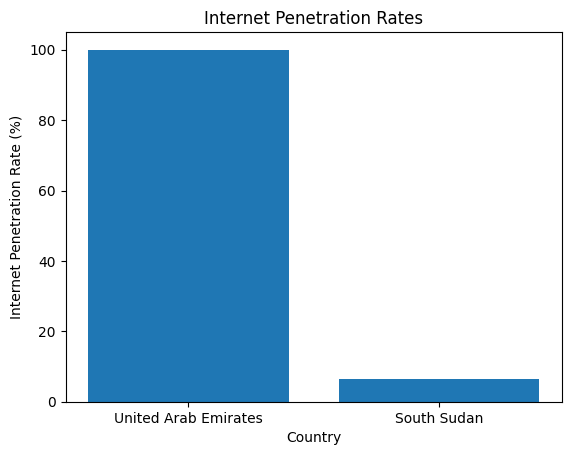

In [ ]:
# Filter the data to exclude countries with a penetration rate of 0% in the most recent year
filtered_data = df[df['Year'] == 2020]
filtered_data = filtered_data[filtered_data['Internet Users(%)'] > 0.0]

# Find the country with the highest & lowest internet penetration rate
highest_penetration_country = filtered_data.loc[filtered_data['Internet Users(%)'].idxmax(), 'Entity']
lowest_penetration_country = filtered_data.loc[filtered_data['Internet Users(%)'].idxmin(), 'Entity']

# Get the highest and lowest internet penetration rates
highest_penetration_rate = filtered_data['Internet Users(%)'].max()
lowest_penetration_rate = filtered_data['Internet Users(%)'].min()

# Data for visualization
countries = [highest_penetration_country, lowest_penetration_country]
penetration_rates = [highest_penetration_rate, lowest_penetration_rate]

# Create bar chart
plt.bar(countries, penetration_rates)
plt.xlabel('Country')
plt.ylabel('Internet Penetration Rate (%)')
plt.title('Internet Penetration Rates')

# Show the plot
plt.show()

3. Which countries have experienced the highest average annual growth in Internet Users?

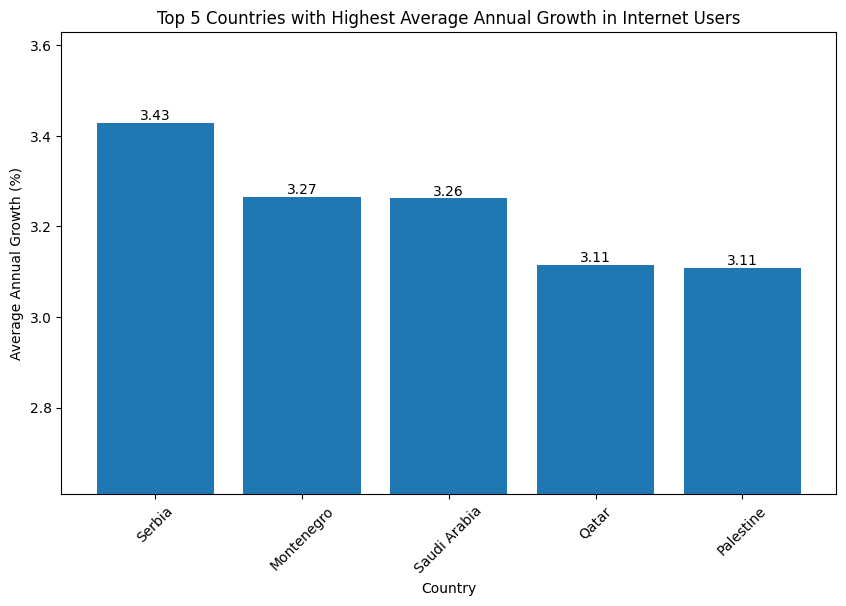

In [ ]:
# Calculate annual growth in internet users
df['Annual Growth'] = df.groupby('Entity')['Internet Users(%)'].diff()

# Calculate average growth rate per year for each country
average_growth = df.groupby('Entity')['Annual Growth'].mean()
# Get the top 5 countries with the highest average growth rate
top_countries = average_growth.nlargest(5)

# Create a DataFrame for the top countries with highest average annual growth
top_countries_df = pd.DataFrame({'Country': top_countries.index, 'Average Annual Growth (%)': top_countries.values})

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_countries_df['Country'], top_countries_df['Average Annual Growth (%)'])

# Add value labels on top of each bar
for i, value in enumerate(top_countries_df['Average Annual Growth (%)']):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Customize the plot
plt.title('Top 5 Countries with Highest Average Annual Growth in Internet Users')
plt.xlabel('Country')
plt.ylabel('Average Annual Growth (%)')
plt.ylim(top_countries.min() - 0.5, top_countries.max() + 0.2)
plt.xticks(rotation=45)

# Show the plot
plt.show()

4. Is there a correlation between cellular subscriptions and the percentage of internet users in different region?

In [ ]:
eu_data = df[df['Entity'] == 'European Union']
south_asia_data = df[df['Entity'] == 'South Asia']

# Calculate Pearson & Spearmancorrelation coefficient
pearson_corr_eu, _ = pearsonr(eu_data['Cellular Subscription'], eu_data['Internet Users(%)'])
spearman_corr_eu, _ = spearmanr(eu_data['Cellular Subscription'], eu_data['Internet Users(%)'])
pearson_corr_sa, _ = pearsonr(south_asia_data['Cellular Subscription'], south_asia_data['Internet Users(%)'])
spearman_corr_sa, _ = spearmanr(south_asia_data['Cellular Subscription'], south_asia_data['Internet Users(%)'])

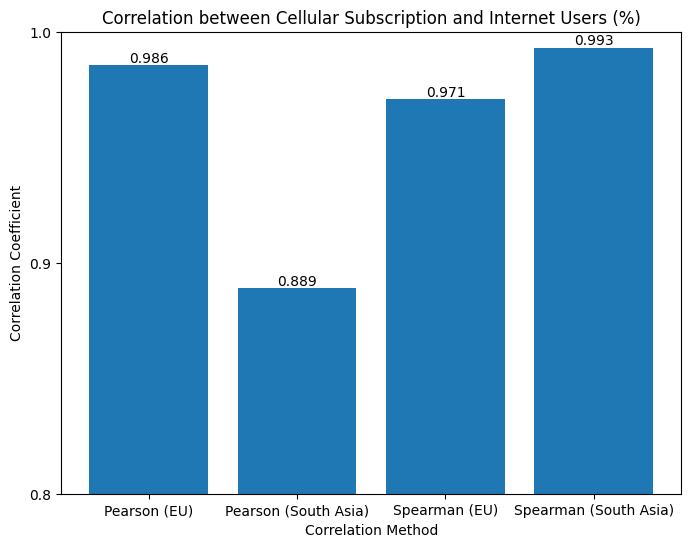

In [ ]:
# Plotting
labels = ['Pearson (EU)', 'Pearson (South Asia)', 'Spearman (EU)', 'Spearman (South Asia)']
correlation_values = [pearson_corr_eu, pearson_corr_sa, spearman_corr_eu, spearman_corr_sa]
fig, ax = plt.subplots(figsize=(8, 6))
bar_plot = ax.bar(labels, correlation_values)

# Set step & range for y-axis scale
ax.yaxis.set_major_locator(plt.MultipleLocator(base=0.1))
ax.set_ylim([0.8, 1])

# Customize other plot elements
ax.set_title('Correlation between Cellular Subscription and Internet Users (%)')
ax.set_xlabel('Correlation Method')
ax.set_ylabel('Correlation Coefficient')

# Add value labels to the bars
for rect in bar_plot:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.3f}',
            ha='center', va='bottom')

plt.show()

5. What is the overall trend of broadband subscription rates across income groups?

In [ ]:
# Filter the data based on income groups
income_groups = ['Low income', 'Middle income', 'High income']
filtered_data = df[df['Entity'].isin(income_groups)]

# Group the filtered data by year and income group, and calculate the average broadband subscription rate
grouped_data = filtered_data.groupby(['Year', 'Entity'])['Broadband Subscription'].mean().reset_index()

# Plot the trend of broadband subscription rates across different income groups using Plotly Express
fig = px.line(grouped_data, x='Year', y='Broadband Subscription', color='Entity',
              title='Trend of Broadband Subscription Rates across Income Groups')
fig.update_layout(xaxis_title='Year', yaxis_title='Broadband Subscription Rate')
fig.show()

6. Can we identify any outliers or anomalies in the dataset related to internet usage accross different regions?

In [ ]:
# Define the list of regions to filter
regions = ['East Asia and Pacific', 'Europe and Central Asia', 'European Union', 'Latin America and Caribbean',
           'Middle East and North Africa', 'United States', 'China', 'World', 'South Africa', 'South Asia']

# Filter the data for the selected regions and relevant variables
filtered_data = df[df['Entity'].isin(regions)][['Entity', 'Year', 'Internet Users(%)', 'No. of Internet Users', 'Broadband Subscription']]

# Plotting
fig = px.scatter(filtered_data, x='No. of Internet Users', y='Internet Users(%)',
                 color='Broadband Subscription', size='Broadband Subscription',
                 labels={'No. of Internet Users': 'No. of Internet Users', 'Internet Users(%)': 'Internet Users(%)'},
                 title='Scatter Plot of Internet Usage Variables',
                 height=700,
                 hover_data=['Entity', 'Year'])  # Include 'Entity' and 'Year' in hover information
fig.show()

7. How has the ratio of cellular subscriptions to broadband subscriptions changed over time in different countries?

In [ ]:
# Filter relevant columns
filtered_data = df[['Entity', 'Year', 'Cellular Subscription', 'Broadband Subscription']]

# Filter data for G20 countries
g20_countries = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Turkey', 'United Kingdom', 'United States', 'European Union']
filtered_data = filtered_data[filtered_data['Entity'].isin(g20_countries)]

# Filter data for years greater than 1995
filtered_data = filtered_data[filtered_data['Year'] > 1995]

# Calculate the ratio of cellular subscriptions to broadband subscriptions
filtered_data['Ratio'] = filtered_data['Cellular Subscription'] / filtered_data['Broadband Subscription']

# Plotting
fig = px.line(filtered_data, 
              x='Year', y='Ratio', color='Entity', 
              title='Ratio of Cellular Subscriptions to Broadband Subscriptions Over Time (G20 Countries)', 
              height=700)
fig.show()


8. Are there any significant differences in internet usage patterns between developed and developing countries?

In [ ]:
# Define the classification criteria for developed and developing countries
developed_countries = [ 'Singapore']
developing_countries = ['Indonesia']

# Filter the data 
developed_data = df[df['Entity'].isin(developed_countries)]
developing_data = df[df['Entity'].isin(developing_countries)]

# Compare internet usage patterns between developed and developing countries
metrics = ['Internet Users(%)', 'Broadband Subscription', 'Cellular Subscription']

# Plotting
data = pd.concat([developed_data, developing_data])
fig = px.line(data, x='Year', y=metrics, color='Entity',
              title='Internet Usage Patterns: Developed vs Developing Countries',
              height=700,
              labels={'Entity': 'Country', 'Year': 'Year', 'value': 'Value', 'variable': 'Metric'})
fig.show()

9. Can we predict future internet usage trends based on historical data and patterns?

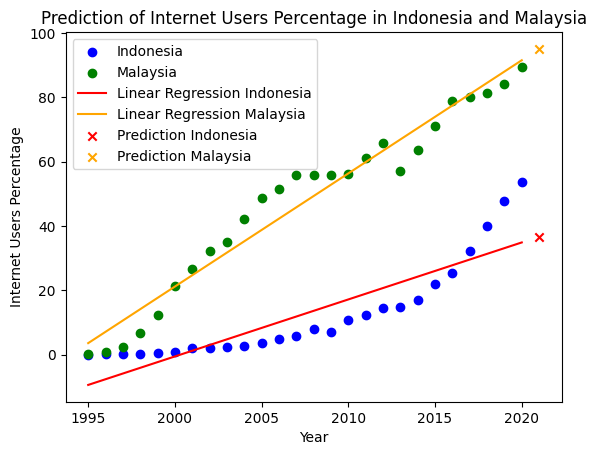

In [ ]:
# Prepare data for Indonesia
indonesia_data = df[(df['Entity'] == 'Indonesia') & (df['Year'] >= 1995)]
X_indonesia = indonesia_data['Year'].values.reshape(-1, 1)
y_indonesia = indonesia_data['Internet Users(%)'].values

# Prepare data for Malaysia
malaysia_data = df[(df['Entity'] == 'Malaysia') & (df['Year'] >= 1995)]
X_malaysia = malaysia_data['Year'].values.reshape(-1, 1)
y_malaysia = malaysia_data['Internet Users(%)'].values

# Build Linear Regression model for Indonesia & Malaysia
model_indonesia = LinearRegression()
model_indonesia.fit(X_indonesia, y_indonesia)
model_malaysia = LinearRegression()
model_malaysia.fit(X_malaysia, y_malaysia)

# Make predictions 
prediction_indonesia = model_indonesia.predict([[2021]])
prediction_malaysia = model_malaysia.predict([[2021]])

# Visualize the predictions
plt.scatter(X_indonesia, y_indonesia, color='blue', label='Indonesia')
plt.scatter(X_malaysia, y_malaysia, color='green', label='Malaysia')
plt.plot(X_indonesia, model_indonesia.predict(X_indonesia), color='red', label='Linear Regression Indonesia')
plt.plot(X_malaysia, model_malaysia.predict(X_malaysia), color='orange', label='Linear Regression Malaysia')
plt.scatter([[2021]], prediction_indonesia, color='red', marker='x', label='Prediction Indonesia')
plt.scatter([[2021]], prediction_malaysia, color='orange', marker='x', label='Prediction Malaysia')
plt.xlabel('Year')
plt.ylabel('Internet Users Percentage')
plt.title('Prediction of Internet Users Percentage in Indonesia and Malaysia')
plt.legend()
plt.show()